In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!df -h


Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   52G   62G  46% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G   36K  6.4G   1% /var/colab
/dev/sda1        92G   65G   27G  71% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [3]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)
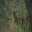

In [5]:
X_train[10]

In [6]:
y_train[10]

array([4], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[y_train[10][0]]

'deer'

In [8]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [9]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)

In [10]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3041 - loss: 1.9313
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4212 - loss: 1.6467
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4526 - loss: 1.5497
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4828 - loss: 1.4801
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4956 - loss: 1.4346


In [27]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4665 - loss: 1.4921


[1.4936450719833374, 0.46380001306533813]

In [12]:
model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.3246346 , 0.27959976, 0.79419714, ..., 0.11072548, 0.46494684,
        0.11369184],
       [0.88341576, 0.882527  , 0.5094897 , ..., 0.20089167, 0.90232646,
        0.989374  ],
       [0.97566324, 0.83226436, 0.6159257 , ..., 0.48691022, 0.9154282 ,
        0.94621164],
       ...,
       [0.06050448, 0.03070271, 0.8924827 , ..., 0.5294282 , 0.39494336,
        0.15984271],
       [0.3874781 , 0.14320351, 0.872597  , ..., 0.520431  , 0.09564754,
        0.27095163],
       [0.47007906, 0.0961728 , 0.8449027 , ..., 0.92147166, 0.10503496,
        0.29900065]], dtype=float32)

In [13]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


6

In [14]:
model.predict(X_test_scaled)[0] #returns prob and dtype

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0.3246346 , 0.27959976, 0.79419714, 0.85020727, 0.47517508,
       0.8208051 , 0.87952644, 0.11072548, 0.46494684, 0.11369184],
      dtype=float32)

In [15]:
def get_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    ])

  model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model
  # model.fit(X_train_scaled, y_train_categorical, epochs=1)

In [16]:
# %%timeit -n1 -r1
# with tf.device('/CPU:0'):
#     cpu_model = get_model()
#     cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

In [17]:
# %%timeit -n1 -r1
# with tf.device('/GPU:0'):
#     cpu_model = get_model()
#     cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

**CNN**

In [23]:
cnn = keras.Sequential([
    # cnn layers
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    # ann layers
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
cnn.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3737 - loss: 1.7214
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6032 - loss: 1.1405
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6508 - loss: 1.0054
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6912 - loss: 0.8996
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7088 - loss: 0.8359


In [29]:
cnn.evaluate(X_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6750 - loss: 0.9514


[0.9499499797821045, 0.6761999726295471]

In [36]:
classes[np.argmax(cnn.predict(X_test_scaled)[1])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


'ship'

In [39]:
len(X_test_scaled)

10000